This project aims to identify fake news using machine learning techniques. The data is obtained from the LIAR dataset. This dataset was developed by <a href='https://sites.cs.ucsb.edu/~william/papers/acl2017.pdfWilliam' target='_blank'> William Yang Wang </a> and consists of three files namely train, test and valid.  The first step is to import the necessary module imports that is numpy, pandas and sk.learn. 

In [74]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

The next step is to read in the liar datasets into Jupyter. The datasets have already been split into training and test datasets.

In [3]:
test = pd.read_csv(r"C:\Users\user\Downloads\liar_dataset\test.tsv", sep='\t')
train = pd.read_csv(r"C:\Users\user\Downloads\liar_dataset\train.tsv", sep='\t')

To examine the test and training datasets, we use the .head() function. below we can see that the dataframes have 14 columns. These columns are:
 - Column 1: Statement ID.
 - Column 2: Label class.
 - Column 3: Statement.
 - Column 4: Subject(s).
 - Column 5: Speaker.
 - Column 6: Speaker's job title.
 - Column 7: The State.
 - Column 8: Party affiliation i.e. Republican or Democrat.
 - Columns 9-13: Total credit history count, including the current statement.
 - Column 14: Venue / location of the statement.

In [4]:
test.head()

,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30.1,42,23,18,Radio interview
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [5]:
train.head()

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


From the cells above we can see all the data contained in the dataframes. As this project aims to detect fake news only the 2nd and 3rd columns are necessary. Below we edit the dataframe to only include those two columns and also name the two columns as Label and Statement columns.

In [5]:
test_data = test.iloc[:,1:3]
test_data.columns = ['Label', 'Statement']

test_data.head(10)

,Label,Statement
0,false,Wisconsin is on pace to double the number of l...
1,false,Says John McCain has done nothing to help the ...
2,half-true,Suzanne Bonamici supports a plan that will cut...
3,pants-fire,When asked by a reporter whether hes at the ce...
4,true,Over the past five years the federal governmen...
5,true,Says that Tennessee law requires that schools ...
6,barely-true,"Says Vice President Joe Biden ""admits that the..."
7,true,Donald Trump is against marriage equality. He ...
8,barely-true,We know that more than half of Hillary Clinton...
9,barely-true,We know there are more Democrats in Georgia th...


In [6]:
train_data = train.iloc[:,1:3]
train_data.columns = ['Label', 'Statement']

train_data.head(10)

,Label,Statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...
5,barely-true,Jim Dunnam has not lived in the district he re...
6,half-true,I'm the only person on this stage who has work...
7,half-true,"However, it took $19.5 million in Oregon Lotte..."
8,mostly-true,Says GOP primary opponents Glenn Grothman and ...
9,mostly-true,"For the first time in history, the share of th..."


Below we examine the shapes of the dataframes to see the proportions of test and train data.

In [7]:
test_data.shape

(1266, 2)

In [8]:
train_data.shape

(10239, 2)

The dataframes contain 6 classes in the Label columns. These classes are True, Mostly-true, Half-true, Barely-true, False and Pants-fire. For the project, there shall be two classes, True and False. True includes the True, Mostly-true, Half-true classes and False includes the Barely-true, False and Pants-fire classes.

In [9]:
test_data.loc[(test_data['Label'] == 'mostly-true') | (test_data['Label'] == 'half-true'), 'Label'] = 'true'

test_data.loc[(test_data['Label'] == 'barely-true') | (test_data['Label'] == 'pants-fire'), 'Label'] = 'false'

test_data.head(10)

,Label,Statement
0,false,Wisconsin is on pace to double the number of l...
1,false,Says John McCain has done nothing to help the ...
2,true,Suzanne Bonamici supports a plan that will cut...
3,false,When asked by a reporter whether hes at the ce...
4,true,Over the past five years the federal governmen...
5,true,Says that Tennessee law requires that schools ...
6,false,"Says Vice President Joe Biden ""admits that the..."
7,true,Donald Trump is against marriage equality. He ...
8,false,We know that more than half of Hillary Clinton...
9,false,We know there are more Democrats in Georgia th...


In [11]:
train_data.loc[(train_data['Label'] == 'mostly-true') | (train_data['Label'] == 'half-true'), 'Label'] = 'true'

train_data.loc[(train_data['Label'] == 'barely-true') | (train_data['Label'] == 'pants-fire'), 'Label'] = 'false'

train_data.head(10)

,Label,Statement
0,true,When did the decline of coal start? It started...
1,true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...
5,false,Jim Dunnam has not lived in the district he re...
6,true,I'm the only person on this stage who has work...
7,true,"However, it took $19.5 million in Oregon Lotte..."
8,true,Says GOP primary opponents Glenn Grothman and ...
9,true,"For the first time in history, the share of th..."


In [12]:
x_train = train_data['Statement']
y_train = train_data['Label']

x_test = test_data['Statement']
y_test = test_data['Label']

The TfidfVectorizer is initialized to transform words into feature vectors. Common English stopwords are filtered out and the maximum document frequency is set at 0.9.

In [13]:
tfidf_vec=TfidfVectorizer(stop_words='english', max_df=0.9)

tfidf_train=tfidf_vec.fit_transform(x_train) 
tfidf_test=tfidf_vec.transform(x_test)

Below different classifiers will be used and compared in order to determine the classifier with the best performance in detecting fake news. The classifiers used are **Passive Aggressive**, **Logistic Regression**, **Naive-bayes**, **Stochastic Gradient Decent**, **Random Forest** and **Linear SVC** classifiers from sklearn. The first classifier is the **Passive Aggressive Classifier**.

In [39]:
pac=PassiveAggressiveClassifier(max_iter=150)
pac.fit(tfidf_train,y_train)

pac_y_pred=pac.predict(tfidf_test)
pac_score=accuracy_score(y_test,pac_y_pred)
print(f'The accuracy is {(pac_score)}')

The accuracy is 0.5521327014218009


The second model is the Naive-Bayes classifier.

In [40]:
nb_model = MultinomialNB()

nb_model.fit(tfidf_train, y_train)
nb_y_pred = nb_model.predict(tfidf_test)

nb_score=accuracy_score(y_test,nb_y_pred)
print(f'The accuracy is {(nb_score)}')

The accuracy is 0.6011058451816745


The third model used is the Logistic Regression Classifier.

In [41]:
lr_model = LogisticRegression()

lr_model.fit(tfidf_train, y_train)
lr_y_pred = lr_model.predict(tfidf_test)

lr_score=accuracy_score(y_test,lr_y_pred)
print(f'The accuracy is {(lr_score)}')

The accuracy is 0.6161137440758294


The fourth model is the Stochastic Gradient Descent Classifier.

In [42]:
sgd_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)

sgd_model.fit(tfidf_train, y_train)
sgd_y_pred = sgd_model.predict(tfidf_test)

sgd_score=accuracy_score(y_test,sgd_y_pred)
print(f'The accuracy is {(sgd_score)}')

The accuracy is 0.6026856240126383


The fourth model is the Random Forest Classifier.

In [43]:
rf_model = RandomForestClassifier(n_estimators=150, n_jobs=-1)

rf_model.fit(tfidf_train, y_train)
rf_y_pred = rf_model.predict(tfidf_test)

rf_score=accuracy_score(y_test,rf_y_pred)
print(f'The accuracy is {(rf_score)}')

The accuracy is 0.608214849921011


The fourth model is the Support Vector Classifier.

In [44]:
svc_model = svm.LinearSVC()

svc_model.fit(tfidf_train, y_train)
svc_y_pred = svc_model.predict(tfidf_test)

svc_score=accuracy_score(y_test,svc_y_pred)
print(f'The accuracy is {(svc_score)}')

The accuracy is 0.6018957345971564


To determine the best model, we compare the results of the different models.

| Model | Accuracy |
| --- | --- |
| Passive Aggressive Classifier | 0.5521 |
| Multinomial NB | 0.6011 |
| Logistic Regression | 0.6161 |
| SGD Classifier | 0.6027 |
| Random Forest Classifier | 0.6082 |
| Linear SVC | 0.6019 |

Purely based on the accuracy, the best performing model is the Logistic Regression Classifier followed by the Random Forest classifier.

Below, the confusion matrix of each model is shown. This provides a clearer overview of the performance of each model. The confusion matrix is made up as:
- True Positives (Top-Left Square): Observation is positive and correctly predicted as positive.
- False Negatives (Top-Right Square): Observation is positive but incorrectly predicted as negative.
- False Positives (Bottom-Left Square): Observation is negative but incorrectly predicted as positive.
- True Negatives (Bottom-Right Square): Observation is negative and correctly predicted as negative.

From the confusion matrices, the best performing models are Logistic Regression, Random Forest and Stochastic Gradient Descent.

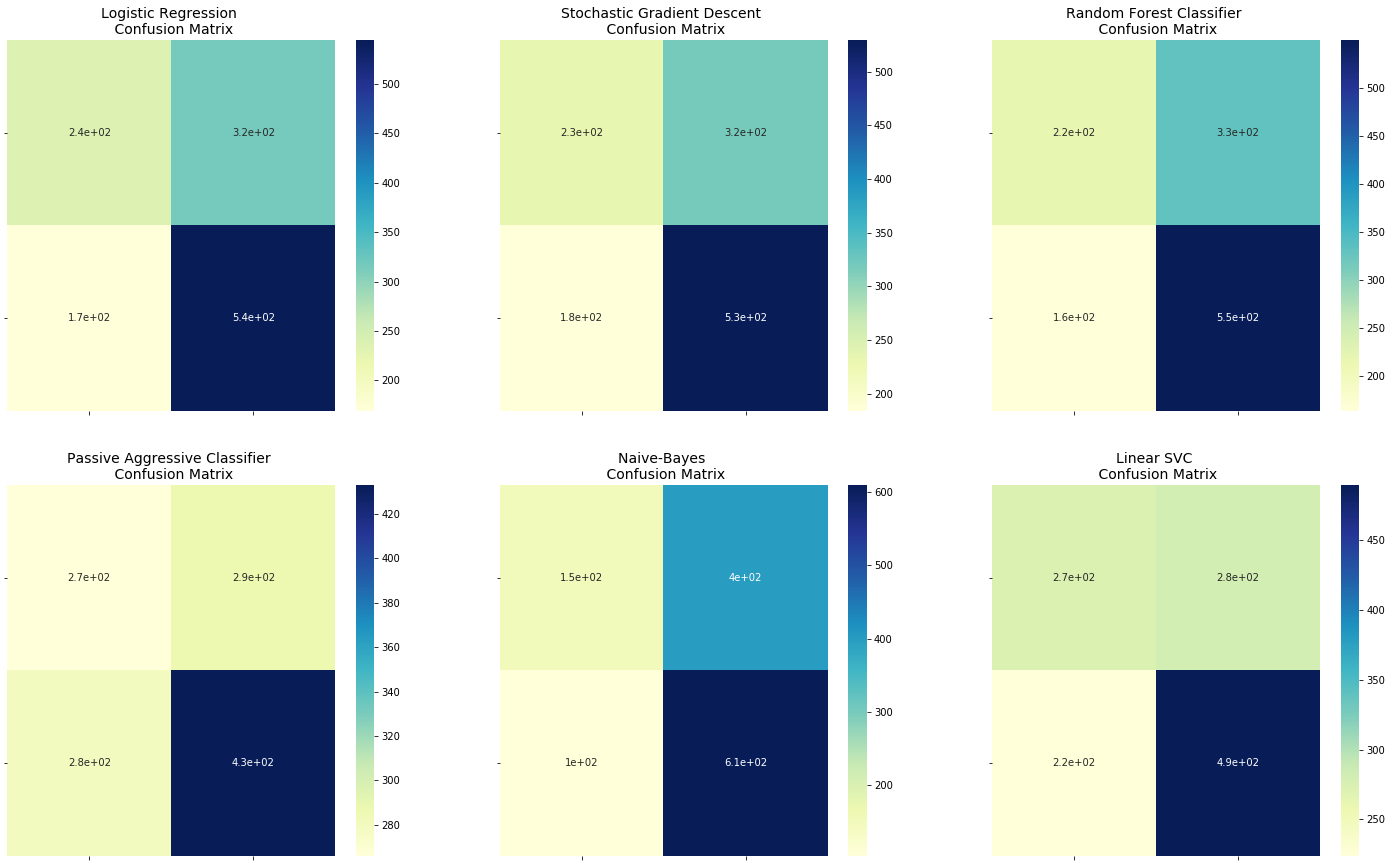

In [45]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

pac_conmat = confusion_matrix(y_test, pac_y_pred)
nb_conmat = confusion_matrix(y_test, nb_y_pred)
lr_conmat = confusion_matrix(y_test, lr_y_pred)
sgd_conmat = confusion_matrix(y_test, sgd_y_pred)
rf_conmat = confusion_matrix(y_test, rf_y_pred)
svc_conmat = confusion_matrix(y_test, svc_y_pred)

fig, ax = plt.subplots(2, 3, figsize=(25,15))

sns.heatmap(lr_conmat , ax=ax[0][0], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(sgd_conmat, ax=ax[0][1], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0][1].set_title("Stochastic Gradient Descent \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(pac_conmat, ax=ax[1][0], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][0].set_title("Passive Aggressive Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(nb_conmat, ax=ax[1][1], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][1].set_title("Naive-Bayes \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_conmat, ax=ax[0][2], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0][2].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[0][2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][2].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_conmat, ax=ax[1][2], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][2].set_title("Linear SVC \n Confusion Matrix", fontsize=14)
ax[1][2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][2].set_yticklabels(['', ''], fontsize=14, rotation=360)



plt.show()

To improve the performance of the top two models(**Logistic Regression** and **Random Forest**), hyper-parameter tuning will be done using both **GridSearchCV** and **RandomizedSearchCV** to determine the final best model to be used as the classifier.

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lr_model = LogisticRegression(max_iter=2000)
#Logistic Regression GridSearchCV

penalty = ['l2']
C = [1, 5, 10, 20]

hyperparameters = dict(C=C, penalty=penalty)

grid_lr = GridSearchCV(lr_model, hyperparameters, cv=3, n_jobs=-1)

grid_lr.fit(tfidf_train, y_train)
grid_lr_y_pred = grid_lr.predict(tfidf_test)

grid_lr_score=accuracy_score(y_test,grid_lr_y_pred)
print(f'The GridSearchCV Logistic Regression accuracy is {(grid_lr_score)}')

#Random Forest GridSearchCV

n_estimators = [100]
max_depth = [10]
random_state = [0]

params = dict(n_estimators = n_estimators, max_depth = max_depth, random_state = random_state)

grid_rf = GridSearchCV(rf_model, params, cv=5, n_jobs=-1)

grid_rf.fit(tfidf_train, y_train)
grid_rf_y_pred = grid_rf.predict(tfidf_test)

grid_rf_score=accuracy_score(y_test,grid_rf_y_pred)
print(f'The GridSearchCV Random Forest accuracy is {(grid_rf_score)}')


The GridSearchCV Logistic Regression accuracy is 0.6161137440758294
The GridSearchCV Random Forest accuracy is 0.5639810426540285


In [87]:
from scipy.stats import uniform

#Logistic Regression RandomSearchCV

penalty = ['l2']
C=uniform(loc=0, scale=4)

hyperparameters = dict(C=C, penalty=penalty)

random_lr = RandomizedSearchCV(lr_model, hyperparameters, cv=10, n_jobs=-1)

random_lr.fit(tfidf_train, y_train)
random_lr_y_pred = random_lr.predict(tfidf_test)

random_lr_score=accuracy_score(y_test,random_lr_y_pred)
print(f'The RandomSearchCV Logistic Regression accuracy is {(random_lr_score)}')

#Random Forest RandomSearchCV

n_estimators = [100]
max_depth = [10]
random_state = [1]

params = dict(n_estimators = n_estimators, max_depth = max_depth, random_state = random_state)

random_rf = RandomizedSearchCV(rf_model, params, cv=10, n_jobs=-1)

random_rf.fit(tfidf_train, y_train)
random_rf_y_pred = random_rf.predict(tfidf_test)

random_rf_score=accuracy_score(y_test,random_rf_y_pred)
print(f'The RandomSearchCV Random Forest accuracy is {(random_rf_score)}')

The RandomSearchCV Logistic Regression accuracy is 0.6113744075829384


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The RandomSearchCV Random Forest accuracy is 0.5639810426540285


From above, hyperparameter tuning had no effect on the accuracy of the Logistic Regression classifier but had a negative effect on the accuracy for the Random Forest accuracy score. Therefore, the best model is the Logistic Regression classifier. 